In [5]:
import os
import time
import uuid
import cv2
import imgviz



In [6]:
!labelme

Traceback (most recent call last):
  File "D:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\anaconda\Scripts\labelme.exe\__main__.py", line 4, in <module>
  File "D:\anaconda\lib\site-packages\labelme\__init__.py", line 26, in <module>
    from labelme import testing
  File "D:\anaconda\lib\site-packages\labelme\testing.py", line 4, in <module>
    import imgviz
  File "D:\anaconda\lib\site-packages\imgviz\__init__.py", line 5, in <module>
    from . import _io as io
  File "D:\anaconda\lib\site-packages\imgviz\_io\__init__.py", line 11, in <module>
    from .pyplot import pyplot_imshow
  File "D:\anaconda\lib\site-packages\imgviz\_io\pyplot.py", line 3, in <module>
    import matplotlib.pyplot
ModuleNotFoundError: No module named 'matplotlib.pyplot'


In [2]:
uuid.uuid1()

UUID('48d186d8-1d6d-11ed-af90-04ea56597a96')

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting Image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [3]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
#gpus = tf.config.experimental.list_physical_devices("GPU")
#for gpu in gpus:
    #tf.config.experimental.set_memory_growth(gpu, True)


In [ ]:
#tf.test.is_gpu_available()

In [ ]:
#tf.config.list_physical_devices('GPU')

In [4]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)
images.as_numpy_iterator().next()

b'data\\images\\14a93b62-1266-11ed-8f73-04ea56597a96.jpg'

In [5]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

In [6]:
images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[ 43,  79,  67],
        [ 46,  79,  68],
        [ 47,  78,  70],
        ...,
        [ 40,  45,  64],
        [ 42,  42,  66],
        [ 43,  43,  67]],

       [[ 48,  81,  70],
        [ 47,  79,  68],
        [ 46,  76,  66],
        ...,
        [ 39,  44,  64],
        [ 39,  41,  64],
        [ 40,  40,  64]],

       [[ 50,  80,  68],
        [ 48,  76,  64],
        [ 47,  73,  62],
        ...,
        [ 37,  42,  64],
        [ 37,  39,  62],
        [ 37,  39,  64]],

       ...,

       [[244, 255, 239],
        [244, 255, 239],
        [244, 255, 239],
        ...,
        [133, 183, 174],
        [130, 181, 174],
        [129, 180, 173]],

       [[246, 255, 238],
        [246, 255, 238],
        [246, 255, 238],
        ...,
        [133, 185, 173],
        [131, 181, 172],
        [131, 181, 172]],

       [[246, 255, 238],
        [246, 255, 238],
        [246, 255, 238],
        ...,
        [132, 184, 172],
        [131, 181, 172],
        [131, 181, 172]]

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [10]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()


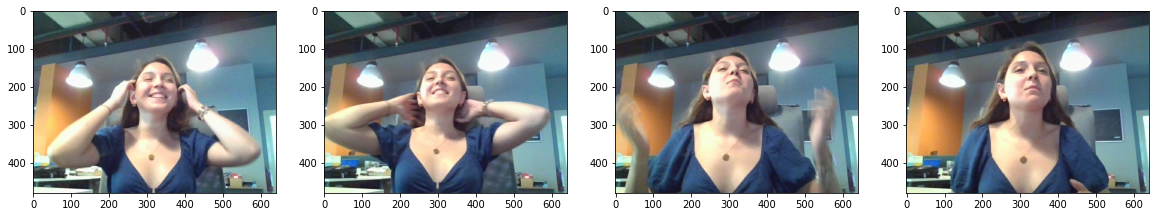

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [12]:
img = cv2.imread(os.path.join('data', 'train', 'images', '1a55873e-1266-11ed-a846-04ea56597a96.jpg'))

In [13]:
print(img.shape)

(480, 640, 3)


In [14]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)


In [15]:
import albumentations as alb

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))


In [16]:
with open(os.path.join('data', 'train', 'labels', '15a18140-1266-11ed-b9b2-04ea56597a96.json'), 'r') as f:
    label = json.load(f)


In [17]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]



In [18]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [19]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes']

[(0.2622786238014664,
  0.16307952622673433,
  0.6345290468133108,
  0.5522504230118443)]

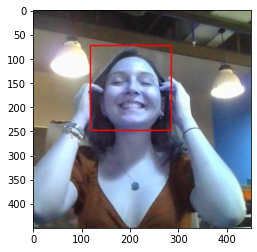

In [20]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (255, 0, 0), 2)
plt.imshow((augmented['image']))

In [1]:


for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0, 0, 00000.1, 00000.1]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]

            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bbox=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'),
                            augmented=['image'])
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0 , 0 , 0 , 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                     annotation['bbox'] = [0 , 0 , 0 , 0]
                     annotation['class'] = 0

                with open (os.path.join('aug_data' , partition , 'labels',f'{image.split(".")[0]}.{x}.json'), 'w') as f :
                    json.dump(annotation , f )

        except Exception as ex:
            print(ex)











NameError: name 'os' is not defined